# Optimal Split

## Imports

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [97]:
# Load the Excel file into a pandas DataFrame
df = pd.read_csv('hospitalization2_team_10.csv')

In [99]:
df_copy = df.copy()

In [101]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8915 entries, 0 to 8914
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   unitName1                  8915 non-null   int64 
 1   Admission_Entry_Date       8915 non-null   object
 2   Release_Date               8915 non-null   object
 3   unitName2                  8915 non-null   int64 
 4   Admission_Entry_Date2      8915 non-null   object
 5   Release_Date2              8915 non-null   object
 6   Entry_Type                 8915 non-null   object
 7   Patient_Origin             8915 non-null   object
 8   Release_Type               8915 non-null   object
 9   Releasing_Doctor           8915 non-null   int64 
 10  Admission_Days2            8915 non-null   int64 
 11  Diagnosis_In_Reception     8915 non-null   object
 12  Diagnosis_In_Release       8915 non-null   object
 13  ct                         8915 non-null   int64 
 14  Admissio

We will create an array that counts the occurrences of each duration in order to plot it in a histogram and view the trends.

In [104]:
duration_counts = df_copy['Admission_Days'].value_counts().sort_index()

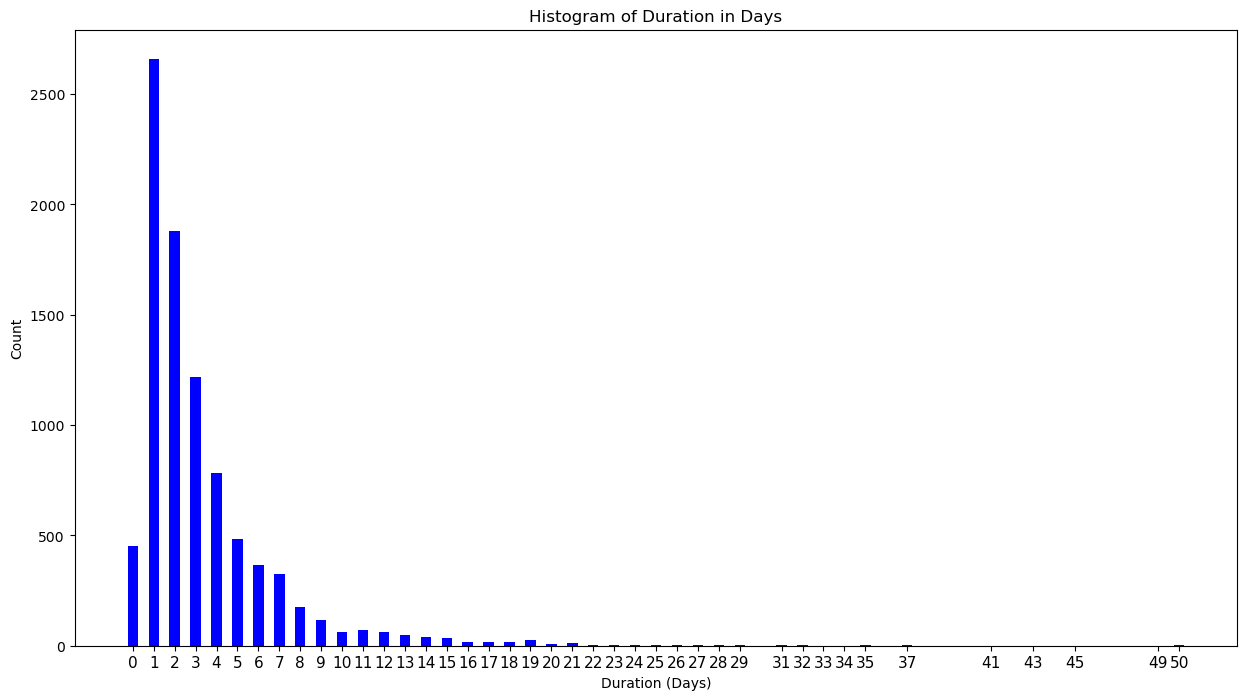

In [106]:
# Plot the histogram
plt.figure(figsize=(15, 8))
plt.bar(duration_counts.index, duration_counts.values, width=0.5, color='blue')
plt.xlabel('Duration (Days)')
plt.ylabel('Count')
plt.title('Histogram of Duration in Days')
plt.xticks(duration_counts.index)  # Ensure each duration day is a tick
plt.xticks(fontsize=11)
plt.show()

We can see in the histogram that the vast majority of the patients were hospitalized for one or two days. 

We will now split the data into 3 quartiles and attempt to find the 3 optimal groups for the number of days in admission.

In [108]:
# Calculate the quartiles
quartiles = np.percentile(df_copy['Admission_Days'], [33, 67])

In [109]:
# Define bin edges for 4 equal-sized groups
bin_edges = [df_copy['Admission_Days'].min(), quartiles[0], quartiles[1], df_copy['Admission_Days'].max()]

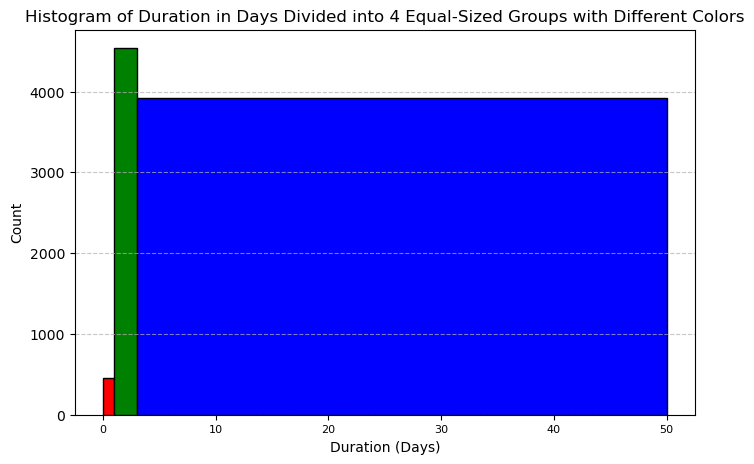

In [110]:
# Define colors for the four quartile bins
colors = ['red', 'green', 'blue']  # One color for each quartile

# Plot histogram using the defined bin edges and assign different colors for each quartile
plt.figure(figsize=(8, 5))
n, bins, patches = plt.hist(df_copy['Admission_Days'], bins=bin_edges, edgecolor='black')

# Assign different colors to the patches (bars)
for i, patch in enumerate(patches):
    patch.set_facecolor(colors[i % len(colors)])  # Assign color from the list

# Add labels and titles
plt.xlabel('Duration (Days)')
plt.ylabel('Count')
plt.title('Histogram of Duration in Days Divided into 4 Equal-Sized Groups with Different Colors')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=8)

plt.show()

In [111]:
# Create labels for the groups based on bin edges
bin_labels = [
    f"Group 1: {int(bin_edges[0])} - {int(bin_edges[1])}",
    f"Group 2: {int(bin_edges[1])} - {int(bin_edges[2])}",
    f"Group 3: {int(bin_edges[2])} - {int(bin_edges[3])}",
]

In [117]:
# Print the group ranges
print("Groups Distribution:\n")
for label in bin_labels:
    print(f"{label} days in admission2\n")

Groups Distribution:

Group 1: 0 - 1 days in admission2

Group 2: 1 - 3 days in admission2

Group 3: 3 - 50 days in admission2



We can see that the optimal split for the number of days in admission is split into 3 groups where group 1 and group 2 are focused on long term hospitalizations of 0-3 days while group 3 focus on the longer hospitalizations for more than 3 days.